# Assignment - 4

## Task -1

In [327]:
import numpy as np
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
class DummyBinaryClassifier(BaseEstimator):             # defined a class.
    def __init__(self, p=0.5, method='uniform_random'):
        self.p = 0.5 if p < 0.0 or p > 1.0 else p
        self.m = method
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        if self.m == "gaussian":
            return (0.5 + np.random.randn(len(X))) < self.p
        elif self.m == "bernoulli":
            return np.bool_(bernoulli.rvs(self.p, size=len(X)))
        else:
            return np.random.rand(len(X)) < self.p

In [328]:
x_1 = np.random.rand(1)

In [329]:
obj_1 = DummyBinaryClassifier(p=0.8, method='bernoulli')
y_1 = obj_1.predict(x_1)    # y_1 is prediction .
from collections import Counter
Count = Counter(y_1) 
{i[0]: i[1] / len(y_1) for i in Count.items()}

{True: 1.0}

In [330]:
# we see that we we have either true or false classification as we have only Feature vector.

In [331]:
x_2 = np.random.rand(1)

In [332]:
obj_2 = DummyBinaryClassifier(p=0.1, method='bernoulli')
y_2 = obj_2.predict(x_2)
from collections import Counter
c = Counter(y_2) 
{i[0]: i[1] / len(y_2) for i in c.items()}

{False: 1.0}

In [333]:
## probability of true is independent of prediction of true as( # of feature vector is 1)

In [334]:
x_3 = np.random.rand(30)

In [335]:
obj_3 = DummyBinaryClassifier(p=0.6, method='bernoulli')
y_3 = obj_3.predict(x_3)    # y_3 is prediction .
from collections import Counter
Count = Counter(y_3) 
{i[0]: i[1] / len(y_3) for i in Count.items()}

{True: 0.6, False: 0.4}

In [336]:
x_4 = np.random.rand(30)

In [337]:
obj_4 = DummyBinaryClassifier(p=0.8, method='bernoulli')
y_4 = obj_4.predict(x_3)    # y_4 is prediction .
from collections import Counter
Count = Counter(y_4) 
{i[0]: i[1] / len(y_4) for i in Count.items()}

{True: 0.8666666666666667, False: 0.13333333333333333}

In [338]:
## as value of p increased i.e (probability of true),then the prediction of true tends to 1. 

In [339]:
# now for any general p 
x_5 = np.random.rand(100)
obj_5 = DummyBinaryClassifier(p=0.5, method='bernoulli')
y_5 = obj_5.predict(x_5)    # y_5 is prediction .
from collections import Counter
Count = Counter(y_5) 
{i[0]: i[1] / len(y_5) for i in Count.items()}

{False: 0.46, True: 0.54}

In [340]:
from collections import Counter
def compute_prior(y):
    c = Counter(y)
    value = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in value:
        value[True] = 0.0
    if False not in value:
        value[False] = 0.0
    return value

In [341]:
ber = []
gaus = []
uni_ran = []

In [342]:
from scipy.stats import bernoulli
import numpy as np

## for bernoulli distribution

In [343]:
p_value = np.arange(0., 1., 0.1)
for p in p_value:
    obj = DummyBinaryClassifier(p=p, method='bernoulli')
    y_5 = obj.predict(x_5)
    val_1 = compute_prior(y_5)
    ber.append(val_1[True])

## for Gaussian distribution

In [344]:
for p in p_value:
    obj = DummyBinaryClassifier(p=p, method='gaussian')
    y_5 = obj_1.predict(x_5)
    val_2 = compute_prior(y_5)
    gaus.append(val_2[True])

## for Uniform Random distribution

In [345]:
for p in p_value:
    obj = DummyBinaryClassifier(p=p, method='uniform_random')
    y_5 = obj_1.predict(x_5)
    val_3 = compute_prior(y_5)
    uni_ran.append(val_3[True])

## Plot

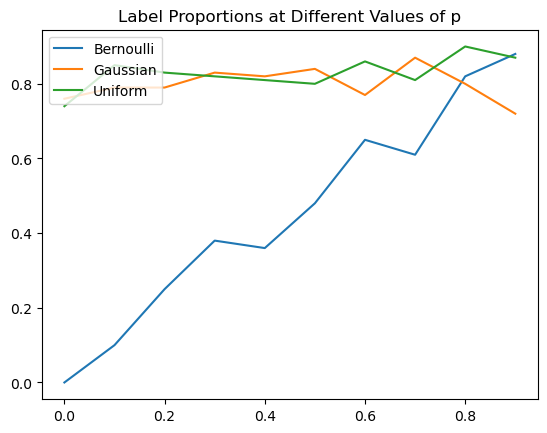

In [346]:
import matplotlib.pyplot as plt
plt.plot(p_value, ber)
plt.plot(p_value, gaus)
plt.plot(p_value, uni_ran)
plt.title('Label Proportions at Different Values of p')
plt.legend(['Bernoulli','Gaussian','Uniform'], loc='upper left')
plt.show()

## Task -2

In [347]:
from sklearn.datasets import load_iris
import pandas as pd

In [348]:
iris_data = load_iris()   ## so that i dont have to call bunch data.
df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])

In [349]:
df.columns    ## to find th columns of dataframe.

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [350]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [351]:
y=iris['target']  

In [352]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [353]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [354]:
def count(value, y):
    return np.sum(y == value)

In [355]:
count(0 , y)  ## to count all the 0 values in array y.

50

In [356]:
count(2 , y)  ## to count all the 2 values in array y.

50

In [357]:
## now we want to add our actual value of y in dataframe df so.
y = pd.DataFrame(y)

In [358]:
y.columns=['species']  

In [359]:
y ## we named the column y as species.

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [360]:
## now combine them both by concat function
new_df = pd.concat([df,y],axis=1)

In [361]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [362]:
## and it's done now we have complete distribution X x y.

## Between sepal length and Sepal width

In [363]:
import seaborn as sns

C:\Users\DELL\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


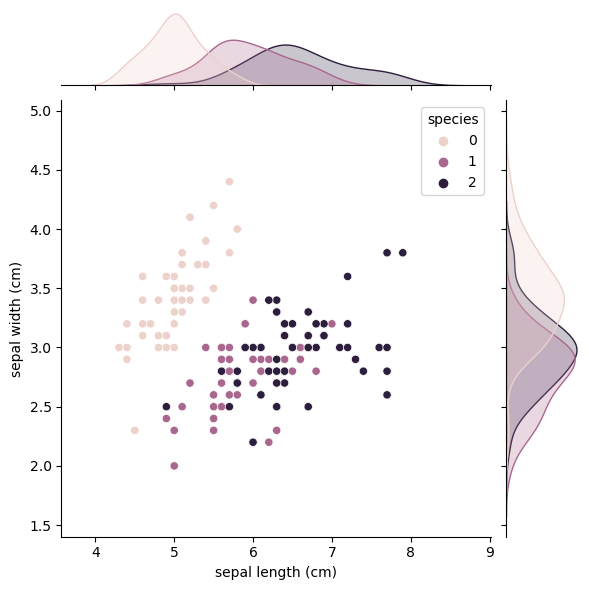

In [364]:
sns.jointplot(x='sepal length (cm)',y='sepal width (cm)',hue='species',data=new_df)

# between Petal length and petal width

C:\Users\DELL\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


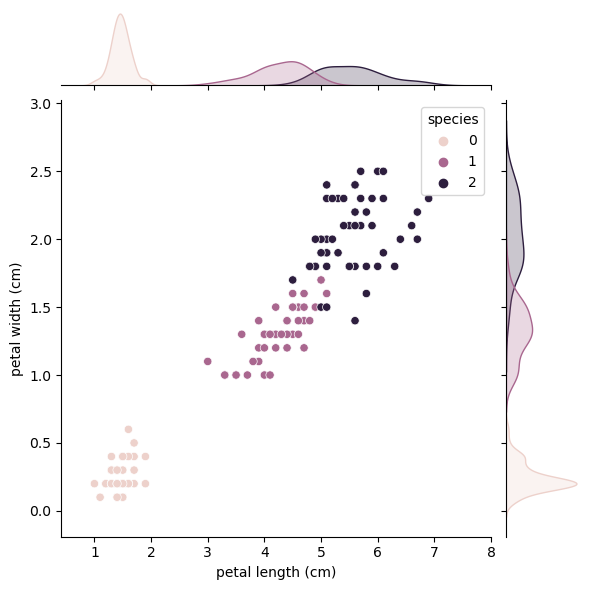

In [365]:
sns.jointplot(x='petal length (cm)',y='petal width (cm)',hue='species',data= new_df)

In [366]:
## Now by using OHE i.e one hot encoding making multi-class dataset into various binary class dataset.

In [367]:
new_df['OHE_0'] = new_df['species'].map({0: 1, 1: 0, 2: 0})

In [368]:
## here actually we mapped every 0 to 1 and 1 to 0 and 2 to 0 , to form new column

In [369]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,OHE_0
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [370]:
## Now let's take out the features_vector

In [371]:
fea_vec = new_df.drop(['species','OHE_0'],axis=1)

In [372]:
fea_vec

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [375]:
def models(p_value, method):
    model = DummyBinaryClassifier(p=p_value, method=method)
    model.fit(fea_vec, y)
    predictions = model.predict(fea_vec)
    return predictions

def correction(val, method):
    p = models(val, method)
    correct_predictions = np.sum(np.array(new_df['OHE_0']) == p)
    return correct_predictions / len(df)

In [376]:
p_values = np.arange(0, 1.1, 0.1)
accuracy_gaussian = [correction(p, 'gaussian') for p in p_values]
accuracy_bernoulli = [correction(p, 'bernoulli') for p in p_values]
accuracy_uniform_random = [correction(p, 'uniform_random') for p in p_values]

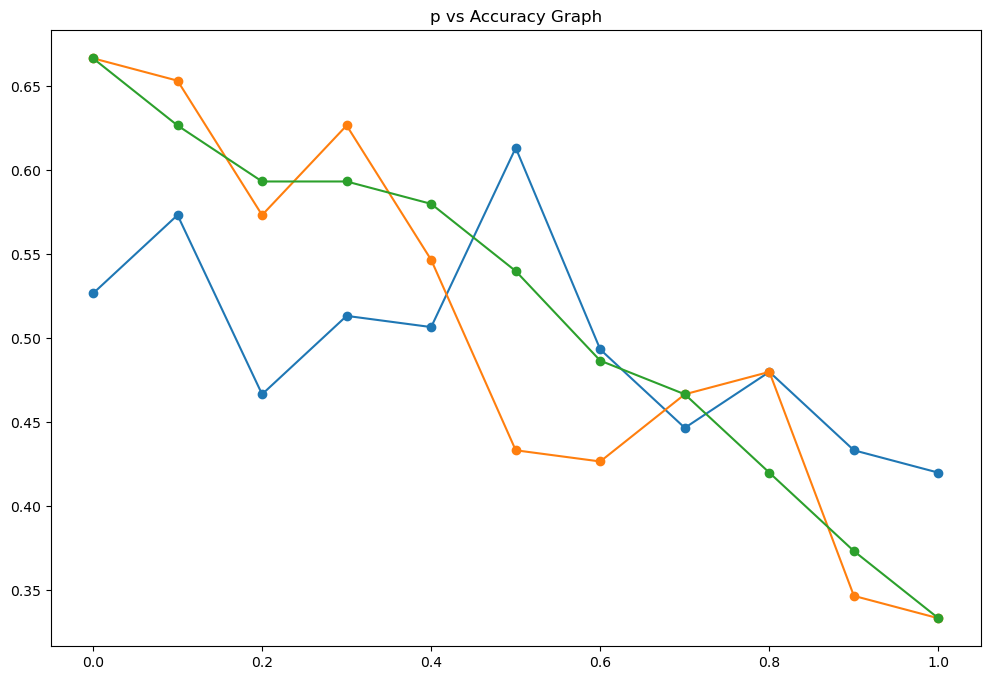

In [377]:
plt.figure(figsize=(12, 8))
plt.plot(p_values, accuracy_gaussian, marker='o', label='gaussian Distribution')
plt.plot(p_values, accuracy_bernoulli, marker='o', label='Bernoulli Distribution')
plt.plot(p_values, accuracy_uniform_random, marker='o', label='Uniform Random')
plt.title('p vs Accuracy Graph')
plt.show()

In [ ]:
## Now we usw metric precision , recall and F1_score to check the performance of our model.

In [381]:
def PRF(p_value , method):
    y_pre = models(p_value,method)
    y_actual = np.array(new_df['OHE_0'])
    t = confusion_matrix(y_actual, y_pre)
    
    tp = t[1][1]  # True Positives
    tn = t[0][0]  # True Negatives
    fp = t[0][1]  # False Positives
    fn = t[1][0]  # False Negatives

    ## formula of precision i.e proportion of predicted positive to the truely positive.
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # formula of recall i.e proportion of actual positive to the correctly classifies.
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Harmonic mean of precision and recall.
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return [precision, recall, f1]

In [382]:
from sklearn.metrics import classification_report,confusion_matrix

In [383]:
for i in np.arange(0,1,0.1):
    print(PRF(i,method='bernoulli'))

[0, 0.0, 0]
[0.5, 0.14, 0.21875000000000003]
[0.34285714285714286, 0.24, 0.2823529411764706]
[0.40476190476190477, 0.34, 0.36956521739130443]
[0.38333333333333336, 0.46, 0.41818181818181815]
[0.3472222222222222, 0.5, 0.4098360655737705]
[0.3263157894736842, 0.62, 0.42758620689655175]
[0.33653846153846156, 0.7, 0.4545454545454546]
[0.3474576271186441, 0.82, 0.4880952380952381]
[0.3333333333333333, 0.92, 0.4893617021276595]


In [384]:
for i in np.arange(0,1,0.1):
    print(PRF(i,method='gaussian'))

[0.3333333333333333, 0.26, 0.2921348314606742]
[0.21818181818181817, 0.24, 0.2285714285714286]
[0.43103448275862066, 0.5, 0.46296296296296297]
[0.2413793103448276, 0.28, 0.25925925925925924]
[0.33783783783783783, 0.5, 0.4032258064516129]
[0.3670886075949367, 0.58, 0.44961240310077516]
[0.36904761904761907, 0.62, 0.4626865671641791]
[0.3118279569892473, 0.58, 0.40559440559440557]
[0.2804878048780488, 0.46, 0.34848484848484856]
[0.35106382978723405, 0.66, 0.45833333333333337]


In [385]:
for i in np.arange(0,1,0.1):
    print(PRF(i,method='uniform_random'))

[0, 0.0, 0]
[0.4375, 0.14, 0.21212121212121213]
[0.3939393939393939, 0.26, 0.3132530120481928]
[0.4339622641509434, 0.46, 0.44660194174757284]
[0.2857142857142857, 0.32, 0.30188679245283023]
[0.38666666666666666, 0.58, 0.464]
[0.3333333333333333, 0.62, 0.43356643356643354]
[0.3577981651376147, 0.78, 0.490566037735849]
[0.328125, 0.84, 0.47191011235955066]
[0.3357664233576642, 0.92, 0.4919786096256685]


## Plot between precision and recall

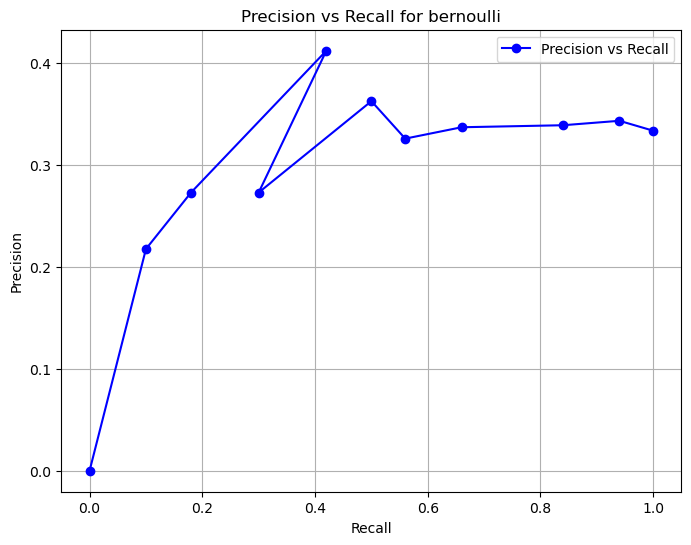

In [388]:
precision = []
recall = []

for i in np.arange(0, 1.1, 0.1):  
    PRC= PRF(i,method='bernoulli')
    precision.append(PRC[0])  # Append precision
    recall.append(PRC[1])     # Append recall

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, 'b-o', label='Precision vs Recall') 
plt.title('Precision vs Recall for bernoulli')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

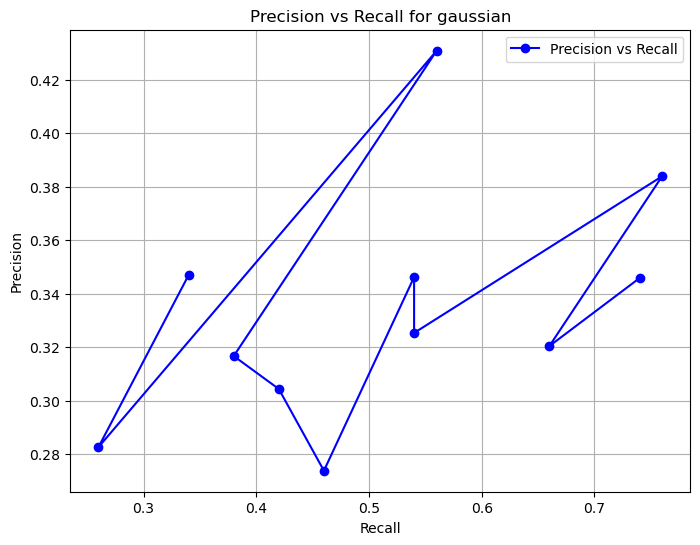

In [389]:
precision = []
recall = []
for i in np.arange(0, 1.1, 0.1):  
    PRC= PRF(i,method='gaussian')
    precision.append(PRC[0])  # Append precision
    recall.append(PRC[1])     # Append recall

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, 'b-o', label='Precision vs Recall')  # Plot with line and markers
plt.title('Precision vs Recall for gaussian')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

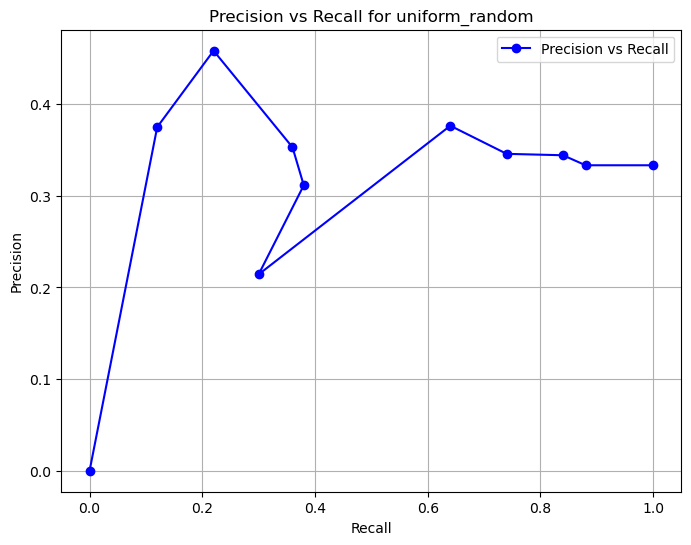

In [399]:
precision = []
recall = []
for i in np.arange(0, 1.1, 0.1):  
    PRC= PRF(i,method='uniform_random')
    precision.append(PRC[0])  # Append precision
    recall.append(PRC[1])     # Append recall

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, 'b-o', label='Precision vs Recall')  # Plot with line and markers
plt.title('Precision vs Recall for uniform_random')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [392]:
def FPR_TPR(p_val,method):
    y_pre = models(p_val,method)
    y_actual = np.array(new_df['OHE_0'])
    t = confusion_matrix(y_actual, y_pre)

    TN = t[0][0]  # True Negatives
    FP = t[0][1]  # False Positives
    FN = t[1][0]  # False Negatives
    TP = t[1][1]  # True Positives
    
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  #False Positive Rate
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  #True Positive Rate 
    
    return [FPR, TPR]

In [397]:
fpr = []
tpr = []
for p in np.arange(0, 1.1, 0.1): 
    fpr_tpr = FPR_TPR(p,method='bernoulli')
    fpr.append(fpr_tpr[0])
    tpr.append(fpr_tpr[1])

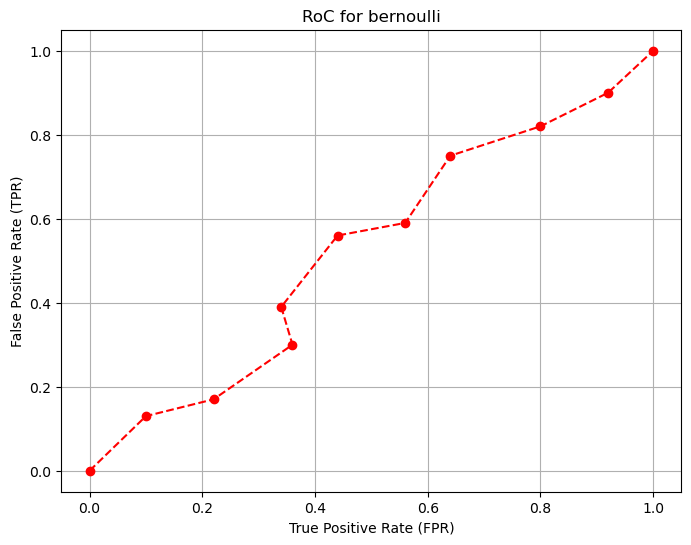

In [398]:
plt.figure(figsize=(8, 6))
plt.plot(tpr,fpr, 'r--', marker='o')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('RoC for bernoulli')  # Roc means Receiver Operating Characteristic .
plt.grid(True)
plt.show()

In [393]:
fpr = []
tpr = []
for p in np.arange(0, 1.1, 0.1): 
    fpr_tpr = FPR_TPR(p,method='gaussian')
    fpr.append(fpr_tpr[0])
    tpr.append(fpr_tpr[1])

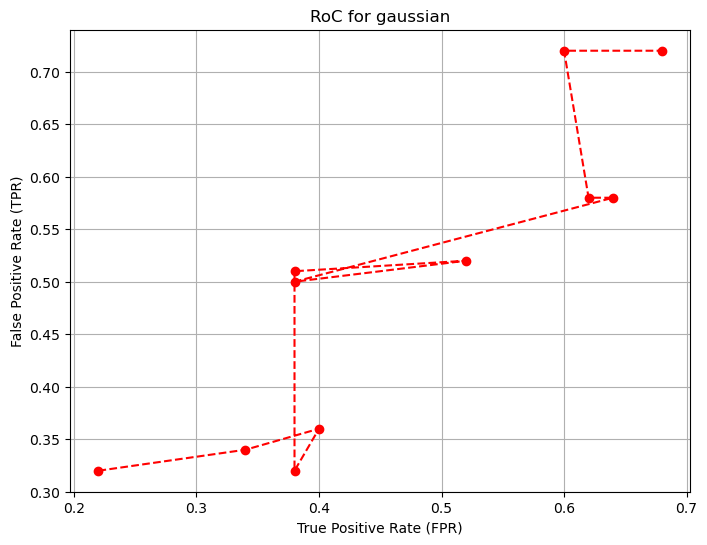

In [396]:
plt.figure(figsize=(8, 6))
plt.plot(tpr,fpr, 'r--', marker='o')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('RoC for gaussian')
plt.grid(True)
plt.show()

In [400]:
fpr = []
tpr = []
for p in np.arange(0, 1.1, 0.1): 
    fpr_tpr = FPR_TPR(p,method='uniform_random')
    fpr.append(fpr_tpr[0])
    tpr.append(fpr_tpr[1])

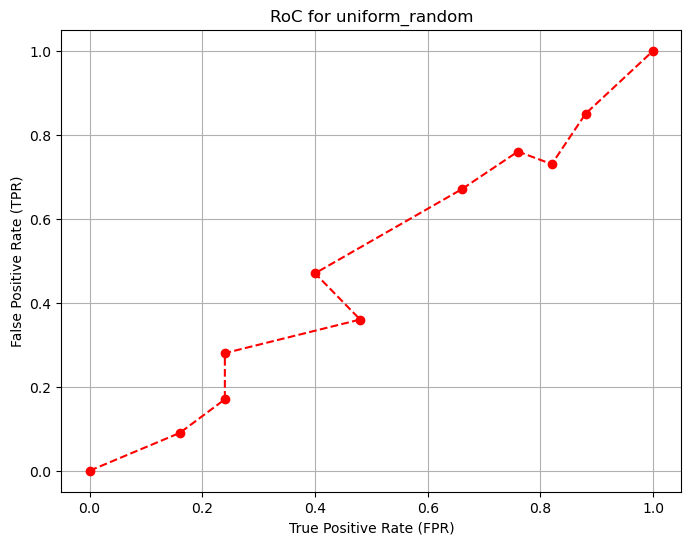

In [401]:
plt.figure(figsize=(8, 6))
plt.plot(tpr,fpr, 'r--', marker='o')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('RoC for uniform_random')
plt.grid(True)
plt.show()

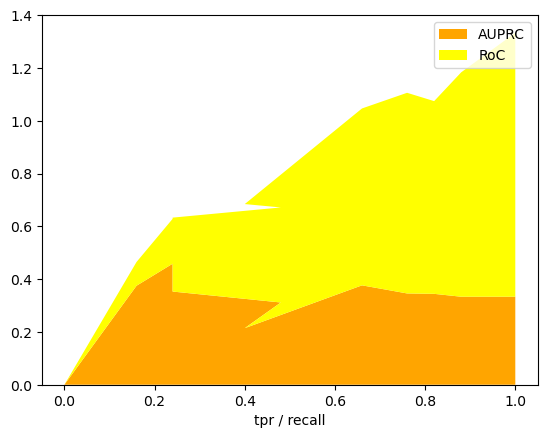

In [402]:
plt.stackplot(tpr,precision,fpr,colors=['orange','yellow'])
plt.legend(['AUPRC','RoC'])
plt.xlabel('tpr / recall')
plt.show()

## Task -3

In [404]:
fea_vec

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
fea_vec = fea_vec.drop(['petal length (cm)','petal width (cm)'],axis=1)

In [409]:
fea_vec

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [418]:
y= iris.target

In [419]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [410]:
from sklearn.model_selection import train_test_split

In [413]:
model_1=DummyBinaryClassifier(0.4,method ='bernoulli')

In [415]:
feature_1 = fea_vec[fea_vec.columns[0]]
feature_2 = fea_vec[fea_vec.columns[1]]
x1 = np.linspace(feature_1.min(), feature_1.max(), 100)
x2 = np.linspace(feature_2.min(), feature_2.max(), 100)
x_1, x_2 = np.meshgrid(x1, x2)

In [416]:
test_data = pd.DataFrame(data=np.column_stack((x_1.flatten(), x_2.flatten())), columns=fea_vec.columns)
test_yhat = model_1.predict(test_data)

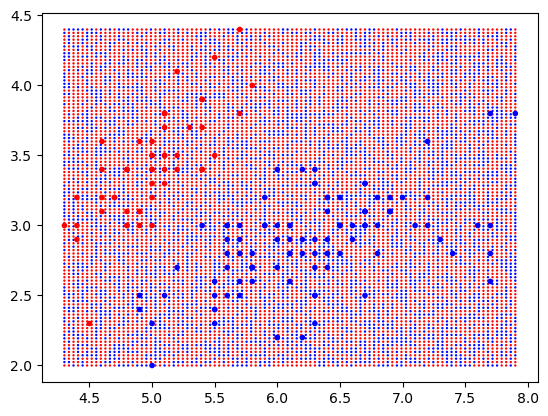

In [420]:
import matplotlib.colors as colors
plt.scatter(x_1, x_2, marker='.', s=2, c=test_yhat, cmap=colors.ListedColormap(['red','blue']))
plt.scatter(feature_1, feature_2, marker='.', c=y, cmap=colors.ListedColormap(['red','blue']))
plt.show()

In [421]:
## to shortify the process let;s built a function for all the modification done above.

In [427]:
def shortcut_map(p, method):
    fea_vec = pd.DataFrame(iris['data'], columns=iris['feature_names'])
    fea_vec = fea_vec.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
    y = iris.target
    
    model_1 = DummyBinaryClassifier(p=p, method=method)
    model_1.fit(fea_vec, y)
    feature_1 = fea_vec[fea_vec.columns[0]]
    feature_2 = fea_vec[fea_vec.columns[1]]
    x1 = np.linspace(feature_1.min(), feature_1.max(), 100)
    x2 = np.linspace(feature_2.min(), feature_2.max(), 100)
    x_1, x_2 = np.meshgrid(x1, x2)
    test_data = pd.DataFrame(data=np.column_stack((x_1.flatten(), x_2.flatten())), columns=fea_vec.columns)
    test_yhat = model_1.predict(test_data).reshape(x_1.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(x_1, x_2, test_yhat, alpha=0.3, cmap=colors.ListedColormap(['red', 'blue']))
    plt.scatter(feature_1, feature_2, c=y, edgecolor='k', cmap=colors.ListedColormap(['red', 'blue']))
    plt.xlabel(fea_vec.columns[0])
    plt.ylabel(fea_vec.columns[1])
    plt.title(f'Decision Boundary (p={p}, method={method})')
    plt.colorbar(label='Class')
    plt.show()

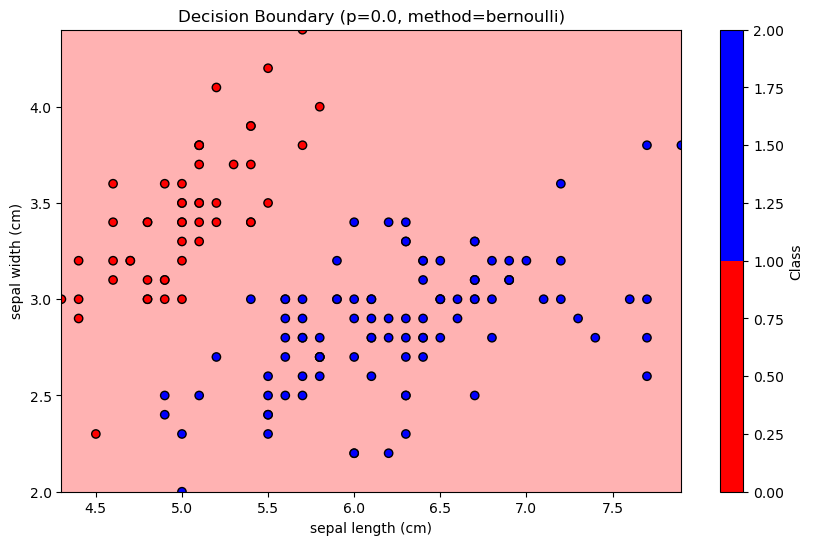

None


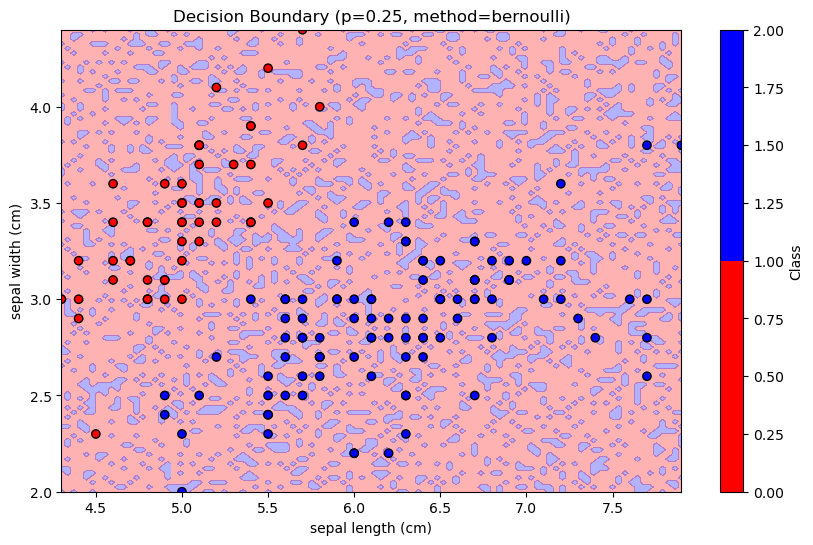

None


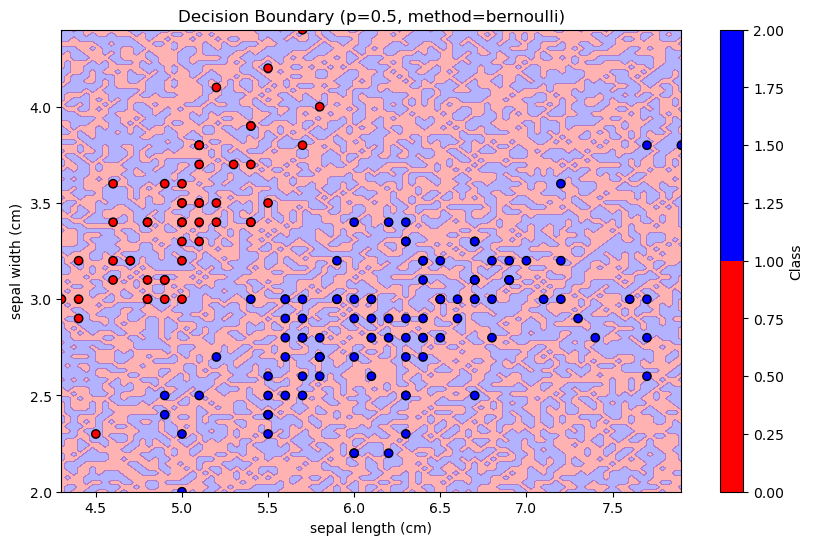

None


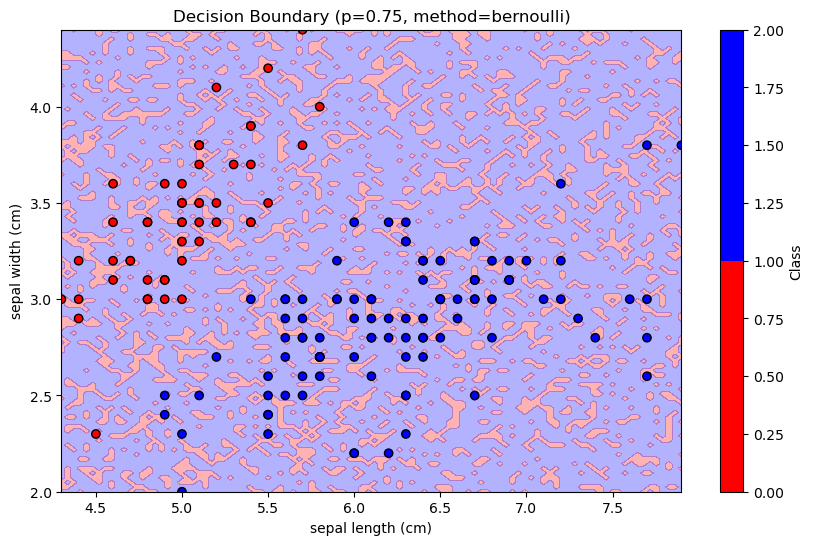

None


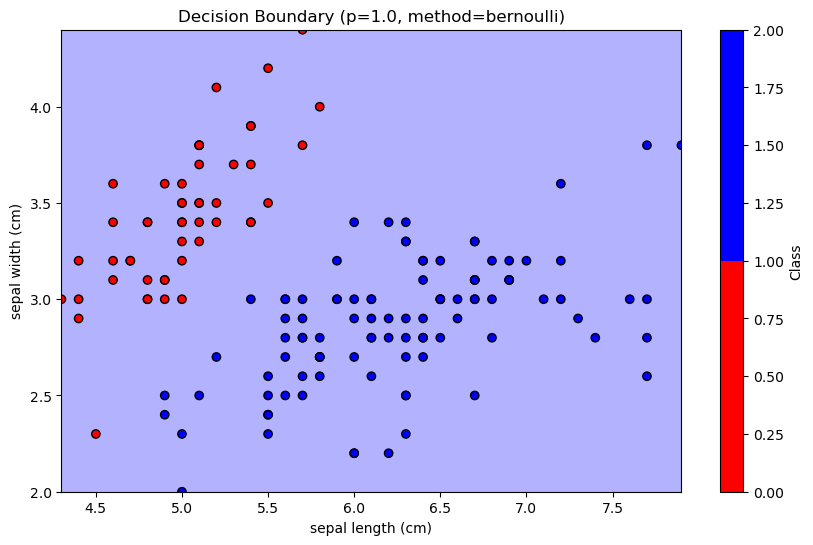

None


In [428]:
for p in np.arange(0,1.1,0.25):   #uniform_random
    print(shortcut_map(p,method = 'bernoulli'))

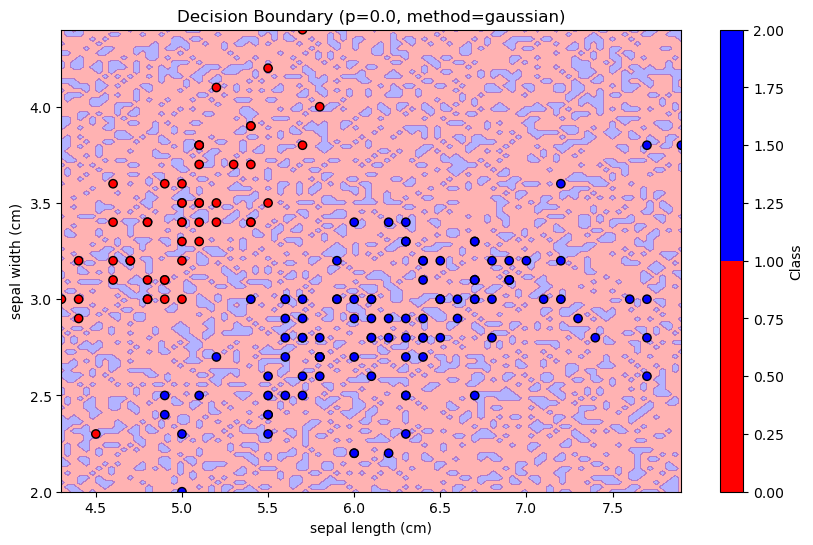

None


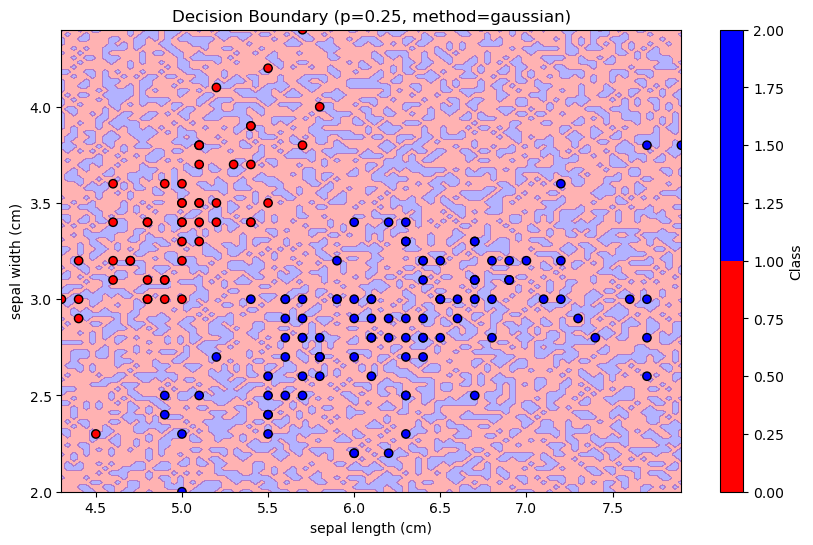

None


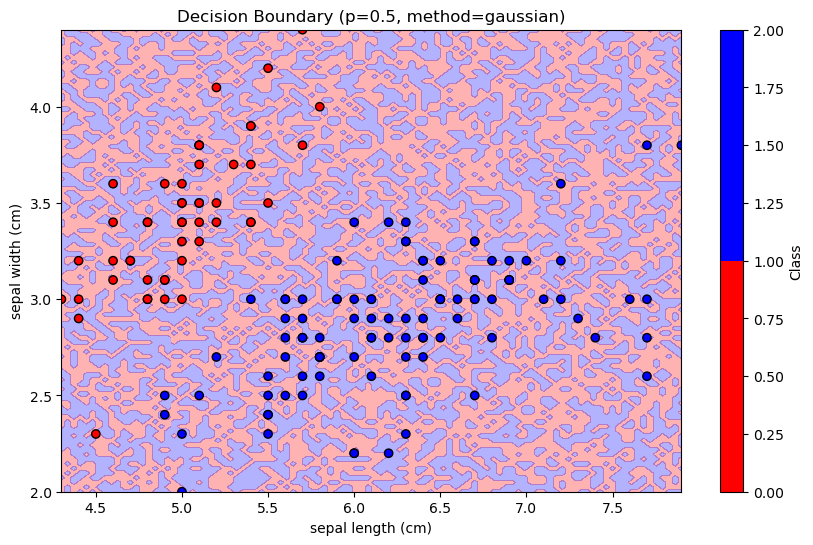

None


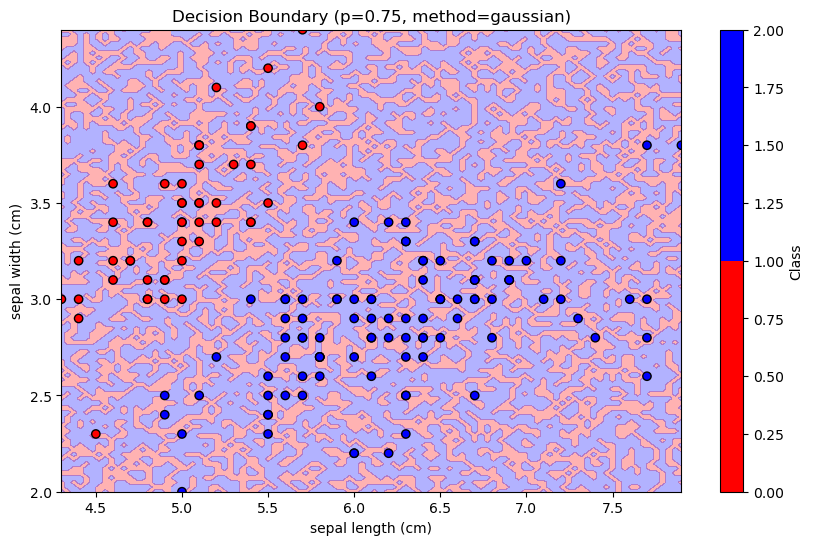

None


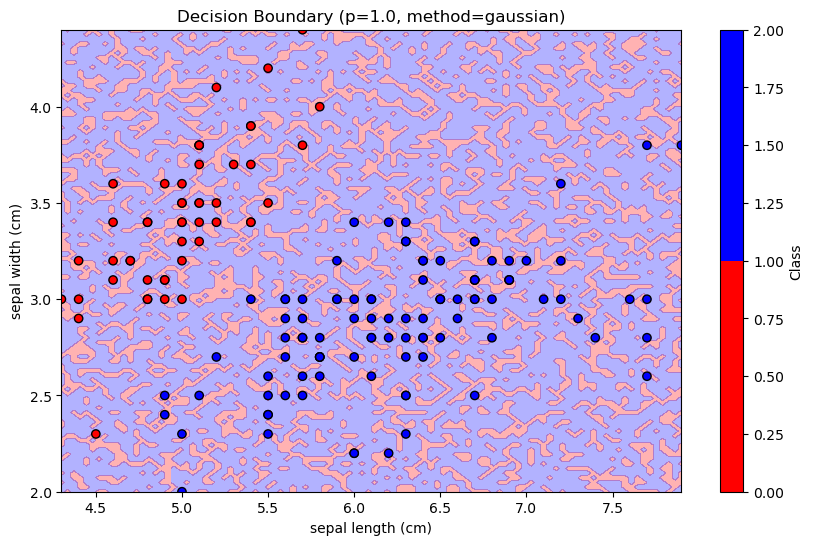

None


In [430]:
for p in np.arange(0,1.1,0.25):   
    print(shortcut_map(p,method = 'gaussian'))

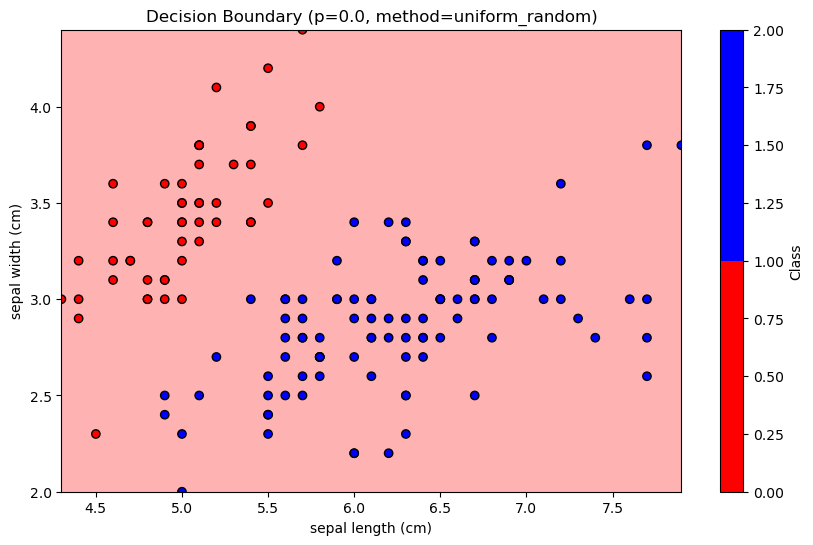

None


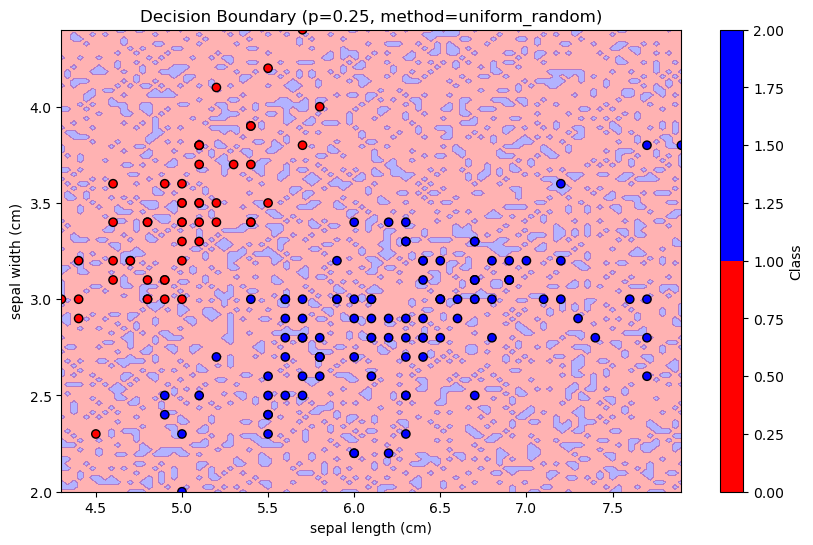

None


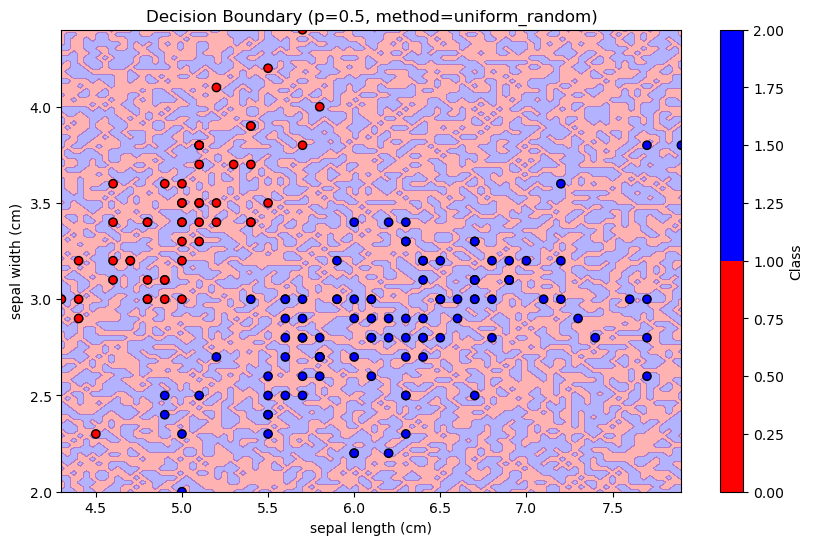

None


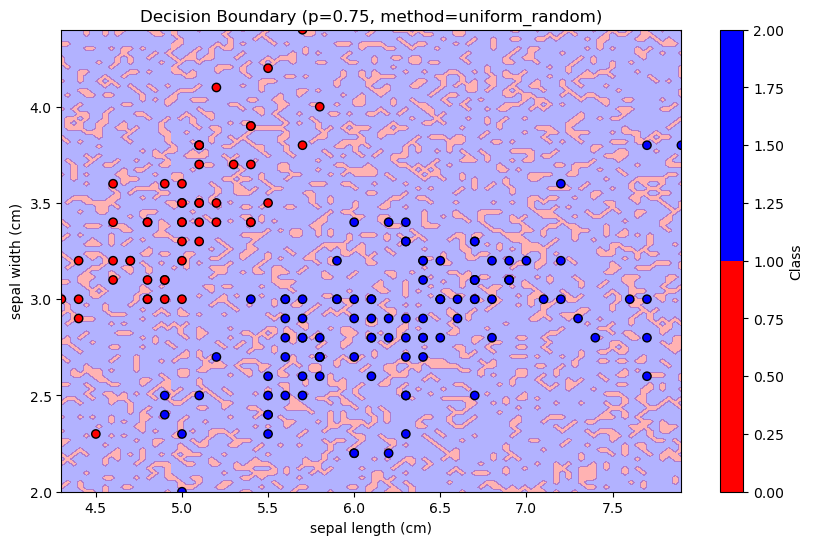

None


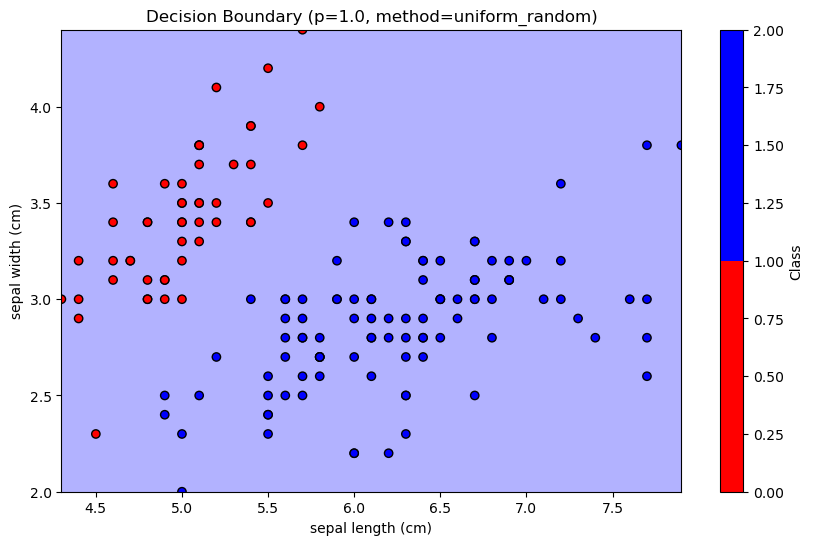

None


In [429]:
for p in np.arange(0,1.1,0.25):   
    print(shortcut_map(p,method = 'uniform_random'))